
# SETUP

In [1]:
from nltk.stem import WordNetLemmatizer
import json
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
download('stopwords')
download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nan_z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nan_z\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# TASK 1 - LOAD DATA

In [16]:
data = pd.read_json('recipes.json', lines=True)


In [17]:
data.head(5)


,Name,url,Description,Author,Ingredients,Method
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an..."
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...


In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1617 non-null   object
 1   url          1617 non-null   object
 2   Description  1429 non-null   object
 3   Author       1611 non-null   object
 4   Ingredients  1617 non-null   object
 5   Method       1617 non-null   object
dtypes: object(6)
memory usage: 75.9+ KB


In [25]:
data['Ingredients'].head(5)


0      tbsp olive oil  knob butter  onion finely ch...
1         g butter chopped     g dark muscovado sug...
2         g dark muscovado sugar     g butter chopp...
3         g strong white flour plus extra for dusti...
4         g self raising flour     g golden caster ...
Name: Ingredients, dtype: object

# TASK 2 - CLEANING


In [24]:
# replace non-numeric characters
data['Ingredients'] = data['Ingredients'].map(
    lambda x: re.sub(r'[^a-zA-Z]', ' ', str(x)))


In [26]:
# remove rows with no ingredients
data = data.dropna(subset=['Ingredients'])


In [35]:
stop = stopwords.words('english') + \
    ['tsp', 'tbsp', 'finely', 'extra', 'chopped']
stop


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# TASK 3 - REMOVE ENCODING


In [36]:
def remove_encoding_word(word):
    word = str(word)
    word = word.encode('ASCII', 'ignore').decode('ASCII')
    return word


def remove_encoding_text(text):
    text = str(text)
    text = ' '.join(remove_encoding_word(word)
                    for word in text.split() if word not in stop)
    return text


In [37]:
data['Ingredients'] = data['Ingredients'].apply(remove_encoding_text)


# TASK 4 - DEFINE LEMMATIZING


In [38]:
lemma = WordNetLemmatizer().lemmatize


# TASK 5 - FIT TF-IDF MODEL


In [39]:
def tokenize_document(document):
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens


In [51]:
vectorizer = TfidfVectorizer(tokenizer=tokenize_document,
                             ngram_range=((1, 2)),
                             stop_words=stop,
                             strip_accents='unicode')


In [52]:
tdm = vectorizer.fit_transform(data['Ingredients'])


c:\Users\nan_z\OneDrive\Documents\GitHub\coursera-creating-a-wordcloud-using-nlp-and-tf-idf-in-python\.venv\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\nan_z\OneDrive\Documents\GitHub\coursera-creating-a-wordcloud-using-nlp-and-tf-idf-in-python\.venv\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn(


# TASK 6 - CREATE WORD CLOUD


In [53]:
tfidf_weights = [(word, tdm.getcol(idx).sum())
                 for word, idx in vectorizer.vocabulary_.items()]


In [54]:
tfidf_weights[0:10]


[('olive', 24.484435233949025),
 ('knob', 6.365399366592445),
 ('butter', 39.5463465462209),
 ('onion', 23.405595387228793),
 ('sausagemeat', 1.607697102640785),
 ('skinned', 2.0118023901761033),
 ('sausage', 4.4087528066830695),
 ('grated', 24.272380263501486),
 ('zest', 21.036328858073258),
 ('lemon', 21.187468912022855)]

In [55]:
w = WordCloud(width=1500,
              height=1200,
              mode='RGBA',
              background_color='white',
              max_words=2000).fit_words(dict(tfidf_weights))


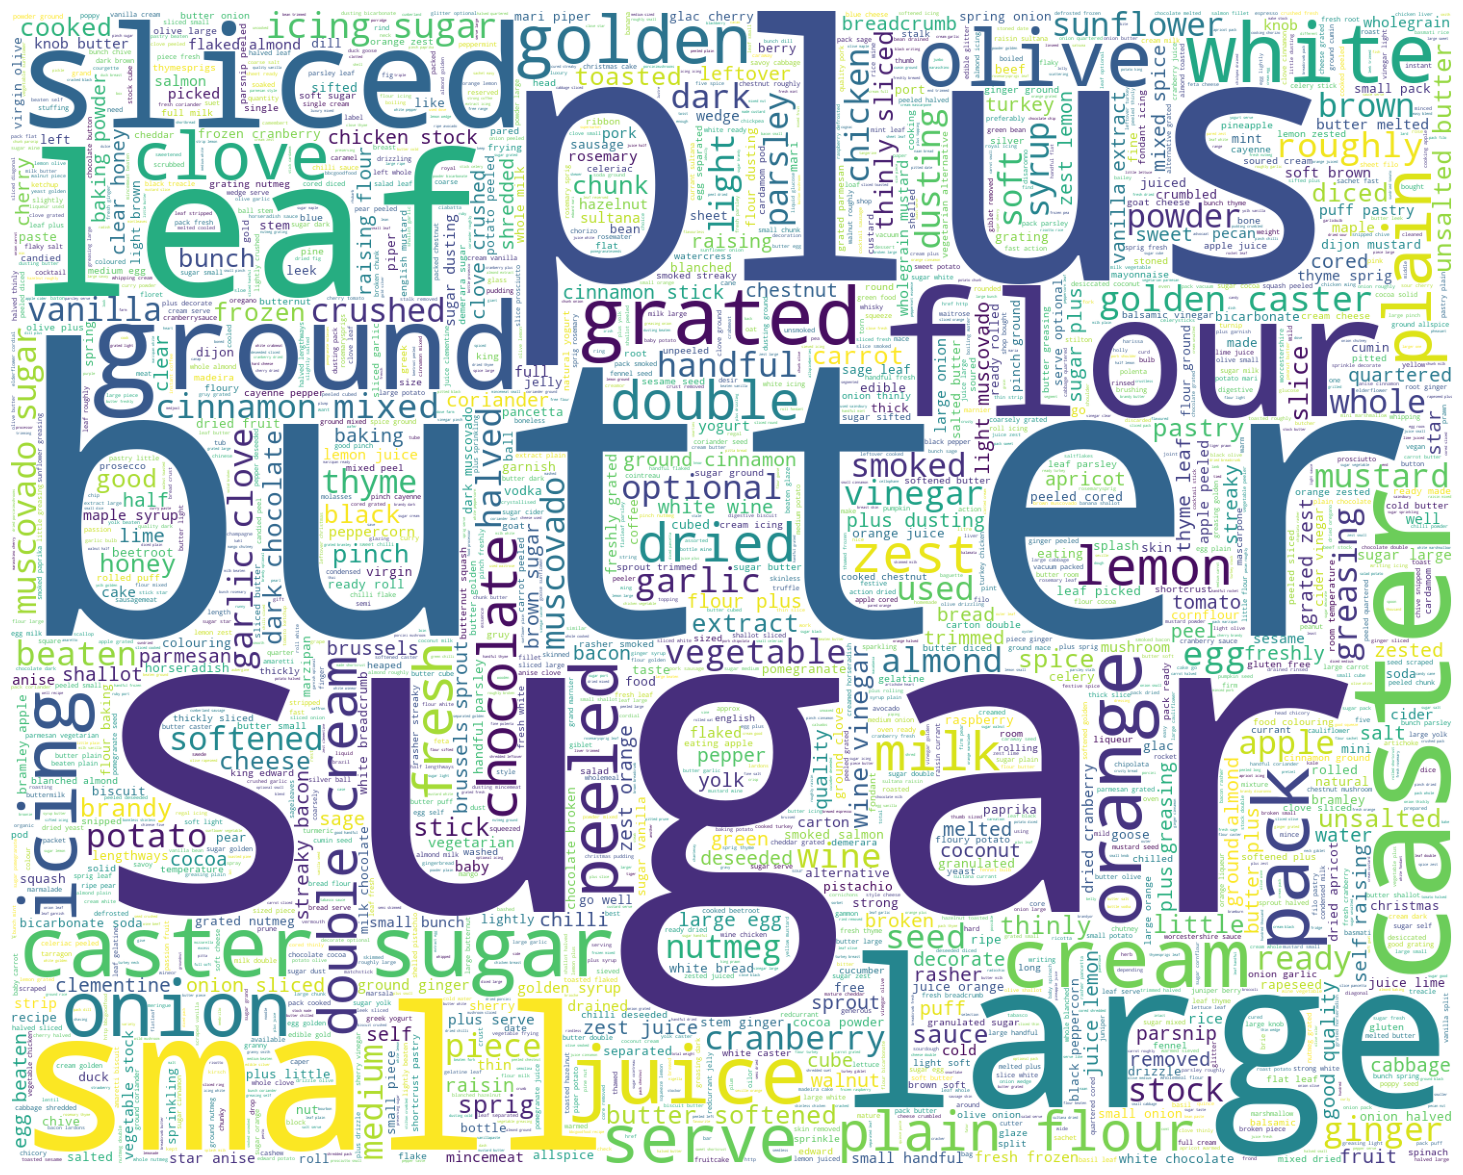

In [56]:
plt.figure(figsize=(20, 15))
plt.imshow(w)
plt.axis('off')
plt.savefig('recipes_wordcord.png')
